In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# 평균 4, 표준편차 0.8인 정규분포를 따르는 모집자
population = stats.norm(loc = 4, scale = 0.8)
type(population)

scipy.stats._distn_infrastructure.rv_frozen

In [3]:
population.rvs(size=10)

array([4.57537015, 2.90386618, 4.48498726, 3.29115289, 4.6659822 ,
       4.8581972 , 3.58277081, 4.65866109, 2.75514491, 2.84258116])

In [4]:
#표본평균을 10000개 얻는 코드
sample_mean_array = np.zeros(10000)
np.random.seed(13)
for i in range(0,10000):
    sample = population.rvs(size=10) #정규분포를 따르는 숫자 10개
    sample_mean_array[i] = np.mean(sample) 
sample_mean_array # 10개씩 랜덤하게 뽑은 것의 평균들의 리스트 

array([4.3976666 , 4.18857764, 3.8425394 , ..., 4.12495865, 4.12127892,
       4.05054023])

In [5]:
len(sample_mean_array)

10000

In [7]:
np.mean(sample_mean_array) #10000개의 평균

4.003651723722899

In [9]:
#표준편차 , 불편분산
np.std(sample_mean_array), np.std(sample_mean_array, ddof=1)

(0.25328735533634056, 0.25330002065401414)

C:\Users\82103\anaconda3\envs\ds_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


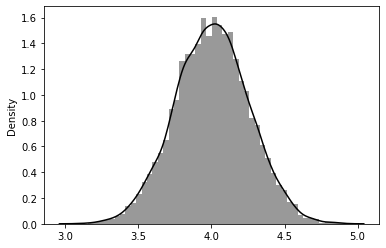

In [11]:
sns.distplot(sample_mean_array,color='black');

In [13]:
#샘플 사이즈를 다양하게 만들고
size_array = np.arange(10,100100,100)
sample_mean_array_size = np.zeros(len(size_array))

In [15]:
len(sample_mean_array_size),sample_mean_array_size

(1001, array([0., 0., 0., ..., 0., 0., 0.]))

In [16]:
for i in range(0,len(size_array)):
    sample = population.rvs(size=size_array[i])
    sample_mean_array_size[i] = np.mean(sample)

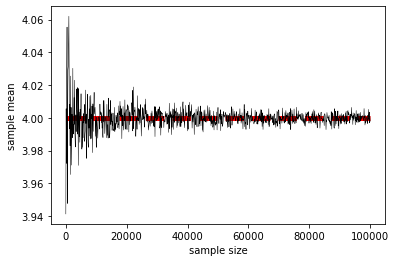

In [20]:
plt.plot(size_array, sample_mean_array_size, color='black',lw=0.5)
plt.hlines(4,0,100000, color='red',linestyles='dashed',lw=5)
plt.xlabel('sample size')
plt.ylabel('sample mean')
plt.show()

In [22]:
#평균을 계산하는 함수
def calc_sample_mean(size, n_trial):
    sample_mean_array = np.zeros(n_trial)

    for i in range(0,n_trial):
        sample = population.rvs(size=size)
        sample_mean_array[i] = np.mean(sample)
    return (sample_mean_array)

In [23]:
size_array = np.arange(2,102,2)
size_array

array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100])

In [25]:
#샘플 사이즈 별로 표준편차 계산
sample_mean_std_array = np.zeros(len(size_array))
np.random.seed(13)

for i in range(0,len(size_array)):
    sample_mean = calc_sample_mean(size=size_array[i], n_trial = 100)
    sample_mean_std_array[i] = np.std(sample_mean, ddof=1)

Text(0, 0.5, 'mean_std value')

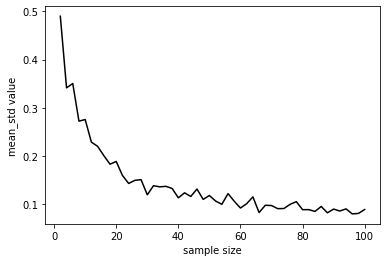

In [28]:
#샘플이 많아지면 평균의 표준편차가 작아짐
plt.plot(size_array, sample_mean_std_array, color = 'black');
plt.xlabel("sample size")
plt.ylabel("mean_std value")

## 표준오차 Standard Error SE
- 샘플이 커지면 표준오차가 작아짐

In [30]:
SE = 0.8 / np.sqrt(size_array)
SE

array([0.56568542, 0.4       , 0.32659863, 0.28284271, 0.25298221,
       0.23094011, 0.21380899, 0.2       , 0.18856181, 0.17888544,
       0.17056057, 0.16329932, 0.15689291, 0.15118579, 0.14605935,
       0.14142136, 0.13719887, 0.13333333, 0.12977714, 0.12649111,
       0.12344268, 0.12060454, 0.11795356, 0.11547005, 0.11313708,
       0.11094004, 0.10886621, 0.1069045 , 0.10504515, 0.10327956,
       0.1016001 , 0.1       , 0.09847319, 0.09701425, 0.09561829,
       0.0942809 , 0.09299811, 0.09176629, 0.09058216, 0.08944272,
       0.08834522, 0.08728716, 0.08626622, 0.08528029, 0.0843274 ,
       0.08340577, 0.0825137 , 0.08164966, 0.0808122 , 0.08      ])

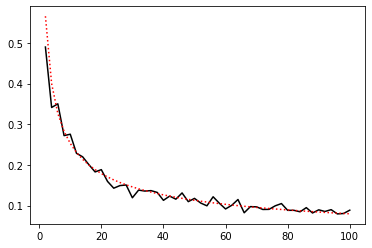

In [33]:
plt.plot(size_array, sample_mean_std_array, color='black')
plt.plot(size_array, SE, color='red', ls="dotted")

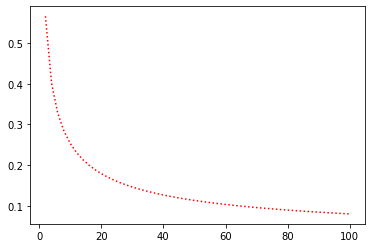

In [32]:
plt.plot(size_array, SE, color='red', ls="dotted")

In [38]:
# 표본분산의 평균값은 모분산과 차이가 있다.
sample_var_array = np.zeros(10000)
np.random.seed(13)
for i in range(0,10000):
    sample = population.rvs(size=10)
    sample_var_array[i] = np.var(sample, ddof=0) 
np.mean(sample_var_array) #모분산은 0.64

0.5792337629333761

In [37]:
# 표본분산의 평균값은 모분산과 차이가 있다.
unbiased_var_array = np.zeros(10000)
np.random.seed(13)
for i in range(0,10000):
    sample = population.rvs(size=10)
    unbiased_var_array[i] = np.var(sample, ddof=1) #불편분산
np.mean(unbiased_var_array) #모분산은 0.64

0.6435930699259735

In [43]:
# 불편분산을 샘플 크기마다 구하고
size_array = np.arange(10,100100, 100)

unbiased_var_array_size = np.zeros(len(size_array))
for i in range(0,len(size_array)):
    sample = population.rvs(size=size_array[i])
    unbiased_var_array_size[i] = np.var(sample,ddof=1) 

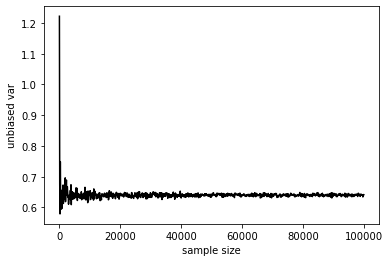

In [44]:
#샘플이 커지면 분산이 모집단에 가까워진다.
plt.plot(size_array, unbiased_var_array_size, color='black')
plt.xlabel("sample size")
plt.ylabel("unbiased var")
plt.show();